## Suyash Srivastava, 22MCS108


In [72]:
import pandas as pd
df=pd.read_csv("./ortho.csv")
df.head()

,Branch_Plant,Item_Nbr,Item_Desc1,Item_Desc2,Lot_Nbr,Location,Product_Line_Code,Product_Line,Item_Type_Code,Item_Type,...,Qty_On_Hand,Qty_Hard_Committed,Total_Value,Total_Value_In_Lacs,Qty_Soft_Committed,Qty_Work_Order_Hard_Committed,Qty_Future_Committed,Qty_Available,Year_Expiry,Item_Month_Aging.1
0,91210,8270310,Dummy Value 48,Dummy Value 95,Dummy Value 100,SSBULK,101,Knees,IMP,Implant SKU,...,24,0,132631.38,1.33,0,0,0,24,2023,1
1,91210,71150004,Dummy Value 31,Dummy Value 75,Dummy Value 54,G12ES1E01,101,Knees,IMP,Implant SKU,...,3,0,20938.15,0.21,0,0,0,3,2023,3
2,91210,71150003,Dummy Value 31,Dummy Value 89,Dummy Value 39,G01FS1B01,101,Knees,IMP,Implant SKU,...,8,0,55917.15,0.56,0,0,0,8,2023,5
3,91210,234010061,Dummy Value 74,Dummy Value 36,Dummy Value 32,T01AS1C01,105,Surgical Implants,IMP,Implant SKU,...,10,0,33614.42,0.34,0,0,0,10,2020,31
4,91209,5545A701,Dummy Value 16,Dummy Value 53,Dummy Value 98,P02AS1A01,101,Knees,IMP,Implant SKU,...,2,0,27788.00,0.28,0,0,0,2,2022,15


## 1. Top 5 products

In [101]:
import seaborn as sn
import numpy as np
tsortedDf=set(df.Product_Line)
# n=len(tsortedDf)
arr=list(tsortedDf)
arr

['Cranio-Maxillofacial',
 'Video',
 'MEDPOR',
 'General Surgery',
 'NSE Other (incl ENT&SilverGli)',
 'Neuro',
 'Navigation',
 'Thoraco-Lumbar',
 'Interbody Devices',
 'Micro - NSE',
 'Endoscopy Service',
 'Cervical',
 'Interventional Pain']

In [113]:
n=len(arr)
n

13

In [124]:
arrLabel=[]
arrCount=[]
j=0
for i in arr:
    x=df.loc[df.Product_Line==i]
    t=x.Qty_Available.count()
    print(j,i,t)
    arrLabel.append(i)
    arrCount.append(t)
    j=j+1
    # arrCount.add(i,t)    

0 Cranio-Maxillofacial 67
1 Video 45
2 MEDPOR 6
3 General Surgery 60
4 NSE Other (incl ENT&SilverGli) 25
5 Neuro 12
6 Navigation 13
7 Thoraco-Lumbar 44
8 Interbody Devices 5
9 Micro - NSE 49
10 Endoscopy Service 1
11 Cervical 6
12 Interventional Pain 4


In [131]:
print(arrCount)
print(arrLabel)

[67, 45, 6, 60, 25, 12, 13, 44, 5, 49, 1, 6, 4]
['Cranio-Maxillofacial', 'Video', 'MEDPOR', 'General Surgery', 'NSE Other (incl ENT&SilverGli)', 'Neuro', 'Navigation', 'Thoraco-Lumbar', 'Interbody Devices', 'Micro - NSE', 'Endoscopy Service', 'Cervical', 'Interventional Pain']


In [128]:
dataCount=pd.DataFrame(list(zip(arrLabel,arrCount)),columns=['Label','Count'])

dataForPlot=dataCount.head().sort_values(by='Count',ascending=False)
dataForPlot.head()

,Label,Count
0,Cranio-Maxillofacial,67
3,General Surgery,60
1,Video,45
4,NSE Other (incl ENT&SilverGli),25
2,MEDPOR,6


<AxesSubplot:xlabel='Count', ylabel='Label'>

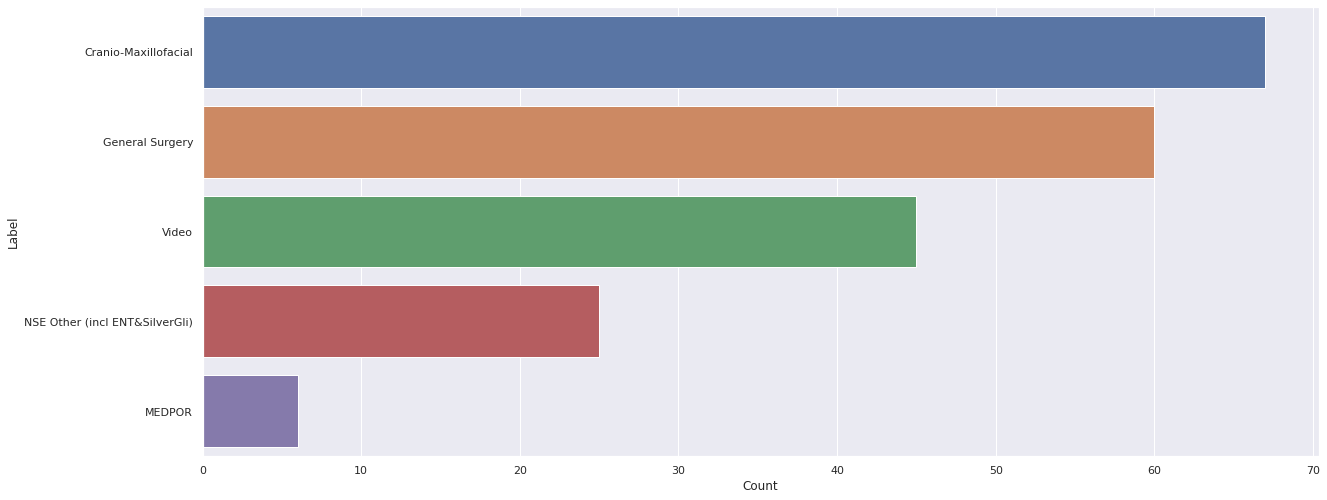

In [130]:
sn.barplot(x=dataForPlot.Count,y=dataForPlot.Label)

In [75]:
import seaborn as sn
import numpy as np
tsortedDf=set(df.Product_Line)
# n=len(tsortedDf)
arr=list(tsortedDf)
t=df.Product_Line.value_counts()
topFive=t.head(5)
topFive

Knees                384
Hips                 146
Surgical Implants     87
LB Power Tools        74
SB Power Tools        42
Name: Product_Line, dtype: int64

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

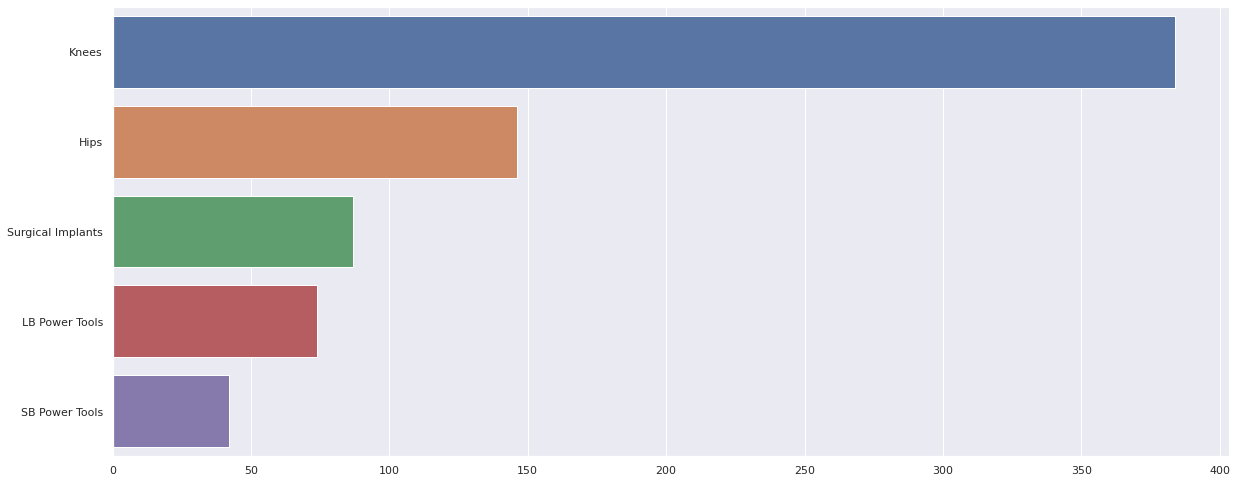

In [76]:
label=['Knees','Hips','Surgical Implants','LB Power Tools','SB Power Tools']
arr=np.array(topFive)
sn.barplot(arr,y=label)

## 2. Branch Plant Split

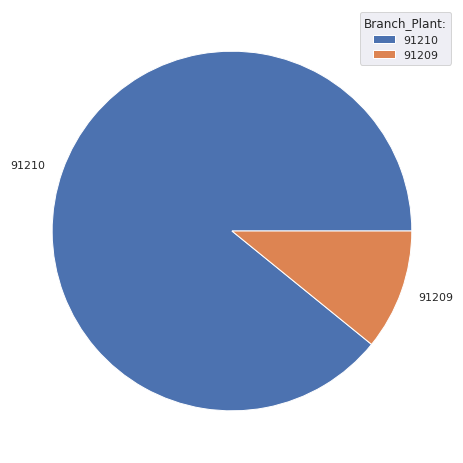

In [77]:
import matplotlib.pyplot as plt
arr=[91210,91209]
t=df.Branch_Plant.value_counts()
plt.pie(t,labels=arr)
plt.legend(title = "Branch_Plant:")
plt.show()

## 3. Item Type Split

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

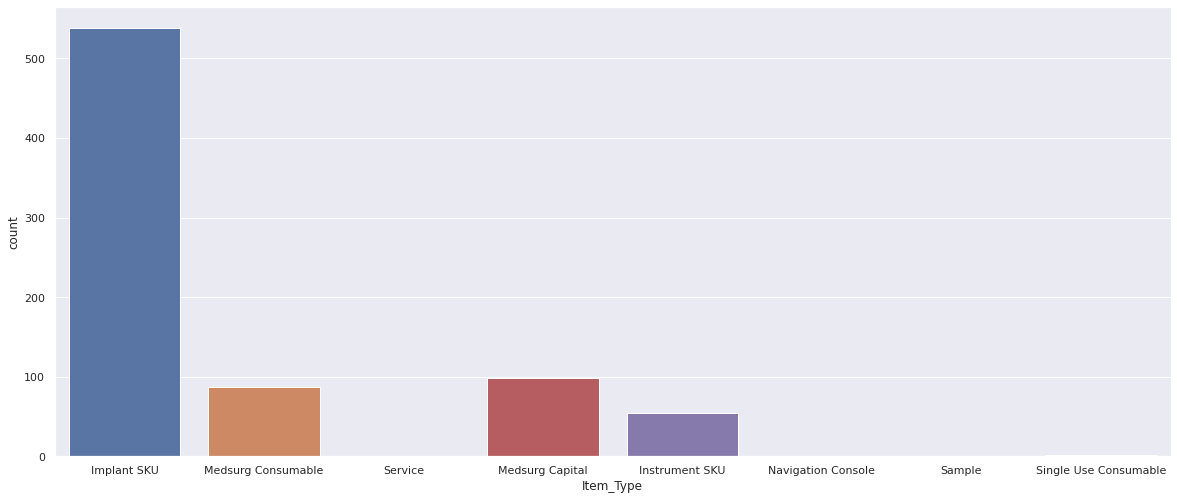

In [79]:
sn.set(rc={'figure.figsize':(20,8.27)})
sn.countplot(x =df.Item_Type)

## 4. Upcoming Item Expiry

In [80]:
val=df.Year_Expiry.value_counts()
val=val.sort_index()
val

2019     42
2020     79
2021    100
2022    197
2023    192
2037      1
2038      1
2040     69
2099    102
Name: Year_Expiry, dtype: int64

In [81]:
t=set(np.array(df.Year_Expiry))
listOfSet = list(t)
listOfSet

[2019, 2020, 2021, 2022, 2023, 2099, 2037, 2038, 2040]

<AxesSubplot:xlabel='Year_Expiry', ylabel='Count'>

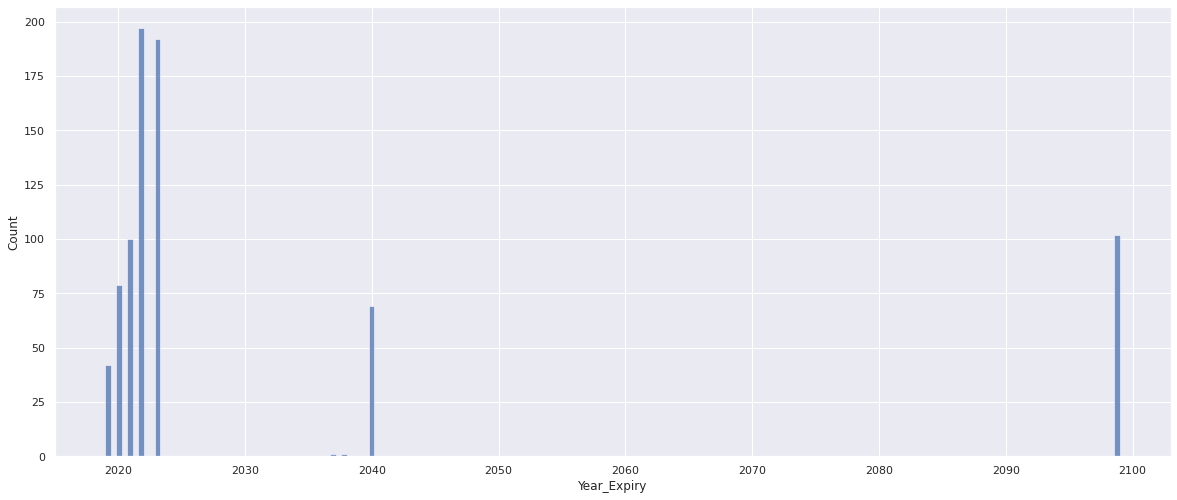

In [82]:
sn.histplot(df.Year_Expiry)
# plt.grid()

In [83]:
import pandas as pd
df=pd.read_csv("./part1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Branch_Plant                   337 non-null    int64  
 1   Item_Nbr                       337 non-null    object 
 2   Item_Desc1                     337 non-null    object 
 3   Item_Desc2                     337 non-null    object 
 4   Lot_Nbr                        337 non-null    object 
 5   Location                       337 non-null    object 
 6   Product_Line_Code              337 non-null    int64  
 7   Product_Line                   337 non-null    object 
 8   Item_Type_Code                 337 non-null    object 
 9   Item_Type                      337 non-null    object 
 10  Product_Level3                 337 non-null    object 
 11  Product_Level4                 337 non-null    object 
 12  Product_Level5                 337 non-null    obj

In [84]:
df.dropna()
tsortedDf=set(df.Product_Line)
n=len(tsortedDf)
t=df.filter(items=['Product_Line','Total_Value']).value_counts()
topFive=t.head(5)
topFive



Product_Line     Total_Value
General Surgery  7909.82        3
Video            74508.12       2
                 64285.95       2
General Surgery  7367.98        2
                 75404.60       2
dtype: int64

<AxesSubplot:>

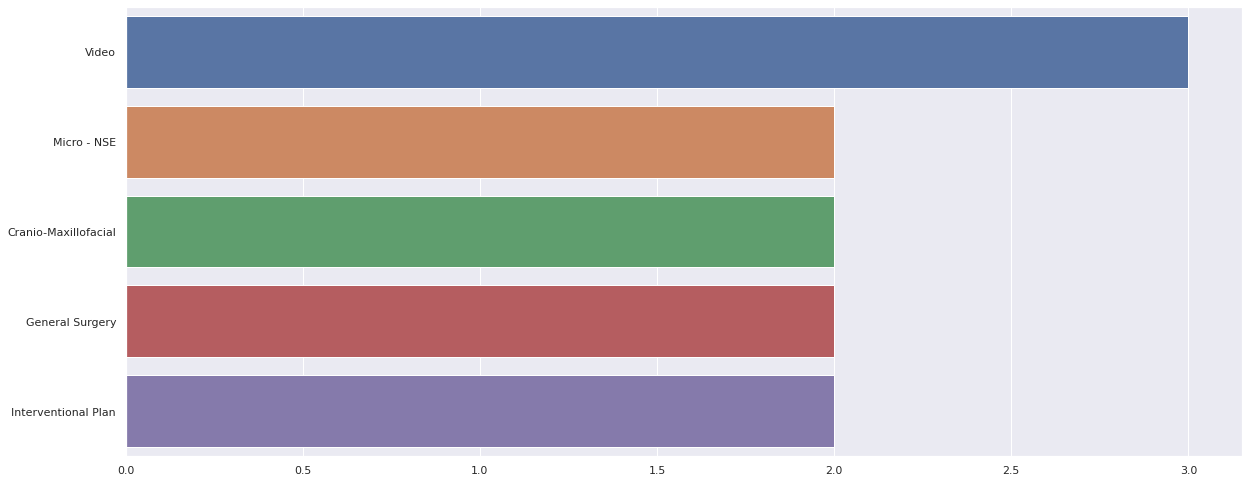

In [85]:
label=['Video','Micro - NSE','Cranio-Maxillofacial','General Surgery','Interventional Plan']
sn.barplot(x=topFive,y=label)